# Introduction to Classification with Neural Network in Tensorflow
Classification is when one needs to classify something as one thing or another:
* Binary classification (0-1) OR (spam, not-spam)
* Multi-class classification (5 classes or 10 classes) - Only one label per sample
* Multilabel classification - Single sample has more than one lables



Classification is all about **predicting an outcome** of some sort.  What is covered in this:
* Architecture of neural network Classification model
* Input (features) shapes and output(labels) shapes of the model
* custom data to view and fit
* steps in Modelling:
  1. creating a Model,
  2. Compiling a model,
  3. Fitting a Model,
  4. Evaluate a Model
* Different Classification Evaluation methods
* Saving and loading models, so if have a saved trained model already we can load it for other applications for going forward.




## Inputs & Outputs of a Classification model
* Inputs: some image -> Numerical encoding
* Model: ML Algo
* outputs: tensors representation prediction prob

## Creating Data to view and fit


In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Example classification data with sklearn
X,y = make_circles(n_samples,
       noise = 0.03,
       random_state = 42)


In [2]:
X, y       # Binary Classification (b/c label is 0-1)

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [3]:
# Data visualize
import pandas as pd

# convert generated to pandas dataframe
df = pd.DataFrame({"x_0": X[:,0], "x_1":X[:,1], "label": y})
df


,x_0,x_1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


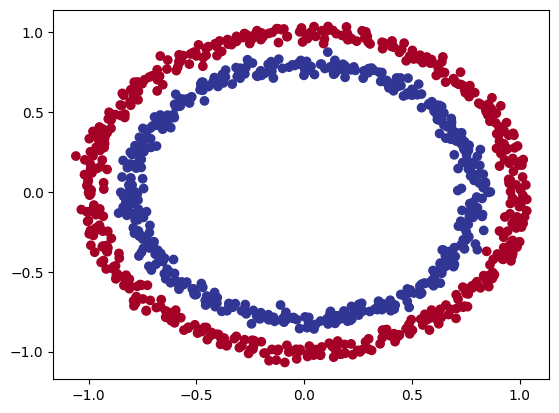

In [4]:
# plot the data
import matplotlib.pyplot as plt

plt.scatter(df["x_0"], df["x_1"], c = y, cmap= plt.cm.RdYlBu)


### Input & output Shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in building Model

* Create or Import a model
* Compile a model
* Fit the model
* Evaluate the model
* adjust
* Evaluate again...

In [7]:
import tensorflow as tf

# set random seed
tf.random.set_seed(42)

# build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2,))
])

# Compile a model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics = ["accuracy"])

# fit the model
model_1.fit(X,y, epochs =5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.8086 - accuracy: 0.4940
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.4830
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7090 - accuracy: 0.4840
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4890


48% accuracy


In [8]:
# adjust
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [9]:
df["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

Appearently, the data thas 50% values for each classification and our model accuracy is still 50% to that. In order to imporove the accuracy of our model, we need to do following steps:
* increase the layers
* change optimizer from SGD to Adam

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = (2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(X,y, epochs=100, verbose=0)

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.5000


[0.70424884557724, 0.5]

Again, it performs pretty poorly. Lets visualize it.

In [12]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_2.predict(X)   # most values are b/w 0.4-05

32/32 [==============================] - 0s 1ms/step


array([[0.46618342],
       [0.5865457 ],
       [0.59304696],
       [0.5978376 ],
       [0.4052776 ],
       [0.60375863],
       [0.57455134],
       [0.45828104],
       [0.46441746],
       [0.6004022 ],
       [0.52324647],
       [0.5289491 ],
       [0.58542544],
       [0.4243182 ],
       [0.41586417],
       [0.43664676],
       [0.56336546],
       [0.44131678],
       [0.57213825],
       [0.5076894 ],
       [0.4937042 ],
       [0.62435174],
       [0.43638432],
       [0.47101134],
       [0.6227863 ],
       [0.6052407 ],
       [0.5630292 ],
       [0.43047446],
       [0.4307741 ],
       [0.4205165 ],
       [0.46806264],
       [0.6067806 ],
       [0.57117945],
       [0.4283064 ],
       [0.4365813 ],
       [0.630444  ],
       [0.60300934],
       [0.52904606],
       [0.43200004],
       [0.49855244],
       [0.50171816],
       [0.5534559 ],
       [0.5188293 ],
       [0.42307764],
       [0.53638065],
       [0.560652  ],
       [0.41489977],
       [0.552

To visualize out model's prediction, lets create a function `plot_decision_boundary()`. The function will:
* Takes the model, features(X) & labels (y)
* create the meshgrid of the different X values
* make predictions across the meshgrid
* plot the predictions and a line b/w zones (where each uniques class falls)

In [14]:
import numpy as np

# plot predicted values against actual data
def plot_decision_boundary(model, X, y):
  """
  plot the decision boundary created by model predicting on X.
  """
  # coordinates
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1

  # meshgrid
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),      # 100 values evenly b/w x_min & x_max
                       np.linspace(y_min, y_max, 100))
  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]                 # stack 2D arrays together

  # Make prediction
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0])>1:
    print("doing Multiclass classification")

    # Reshape the prediction
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu)
  # plot the original Data
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())







In [15]:
x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [16]:
# meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))     # 100 values evenly b/w x_min & x_max

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [17]:
# Create X values
x_in = np.c_[xx.ravel(), yy.ravel()]                 # stack 2D arrays together
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

313/313 [==============================] - 0s 1ms/step
Binary classification


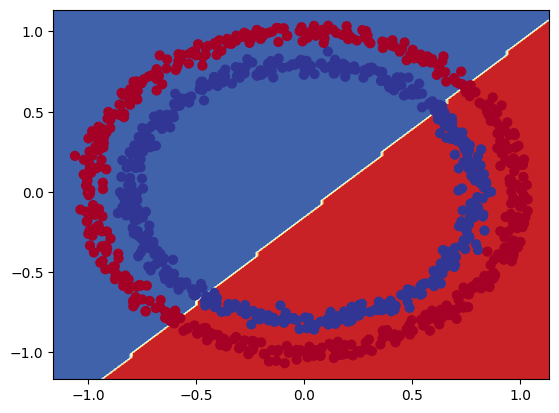

In [18]:
# check what prediction our model is making
plot_decision_boundary(model_2, X=X, y=y)

it appears our model drawing a straight line throgh a circuilar (Non-Linear) data. This function is borrowed by:
* [CS231 neural Network](https://cs231n.github.io/neural-networks-case-study/)



In [19]:
# Building NN with non-linear activation function
tf.random.set_seed(42)

# create a model
model_nl = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

# compile
model_nl.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fit
history = model_nl.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0170 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0121 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9907 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9857 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9843 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9734 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9335 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8738 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8582 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7904 - accuracy: 0.4840
Epoch 11/

still not learning

In [20]:
# Building NN with non-linear activation function + adding extra layers
tf.random.set_seed(42)

# create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)

])

# compile
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fit
history = model_6.fit(X,y,epochs=600)

Epoch 1/600
32/32 [==============================] - 1s 2ms/step - loss: 4.2154 - accuracy: 0.5000
Epoch 2/600
32/32 [==============================] - 0s 2ms/step - loss: 2.2160 - accuracy: 0.5000
Epoch 3/600
32/32 [==============================] - 0s 2ms/step - loss: 1.2670 - accuracy: 0.5000
Epoch 4/600
32/32 [==============================] - 0s 2ms/step - loss: 1.1655 - accuracy: 0.5000
Epoch 5/600
32/32 [==============================] - 0s 2ms/step - loss: 1.0966 - accuracy: 0.5000
Epoch 6/600
32/32 [==============================] - 0s 2ms/step - loss: 1.0397 - accuracy: 0.5000
Epoch 7/600
32/32 [==============================] - 0s 2ms/step - loss: 0.9913 - accuracy: 0.5000
Epoch 8/600
32/32 [==============================] - 0s 2ms/step - loss: 0.9474 - accuracy: 0.5000
Epoch 9/600
32/32 [==============================] - 0s 2ms/step - loss: 0.9120 - accuracy: 0.5000
Epoch 10/600
32/32 [==============================] - 0s 2ms/step - loss: 0.8831 - accuracy: 0.5000
Epoch 11/

we have seen an improvements


In [21]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000


[0.0032564823050051928, 1.0]

pretty high accuracy - but epochs are too high.

313/313 [==============================] - 0s 1ms/step
Binary classification


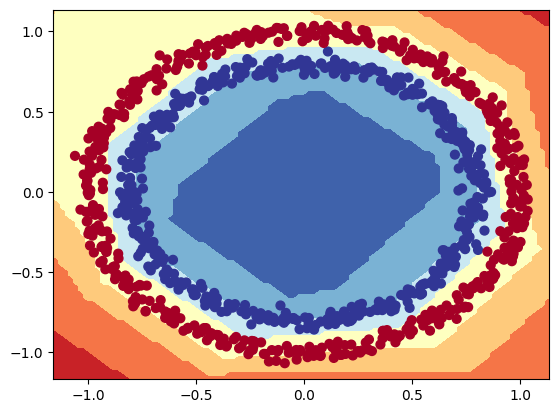

In [22]:
# visualize
plot_decision_boundary(model_6,X,y)

shows some sort of performance. lets try reducing the epochs and include the activation function on output layer

In [23]:
# Building NN with non-linear activation function + adding extra layers
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# compile
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fit
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5070
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6876 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5140
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5130
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5200
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5220
Epoch 11/

In [24]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.6900


[0.5830090045928955, 0.6899999976158142]

313/313 [==============================] - 1s 2ms/step
Binary classification


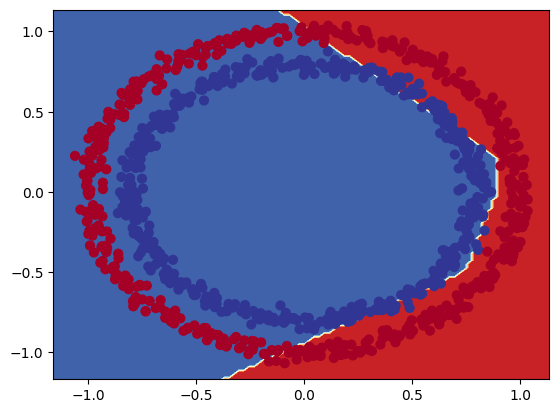

In [25]:
# visualize
plot_decision_boundary(model_7,X,y)

Almost perfectly put up! The combinations of straight lines (Linear) & non straight lines (non-linear) function is one of the key fundamentals of Neural networks.



### plot History curve


Text(0, 0.5, 'prob')

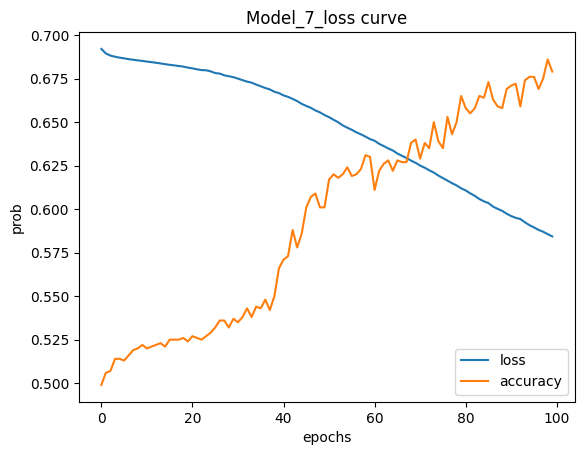

In [26]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_7_loss curve")
plt.xlabel("epochs")
plt.ylabel("prob")

For many problems, the loss function going down means the model is improving (the predictions are getting more closer to real values or ground truth labels)

We can compare multiple models and check the loss curves.

### Finding the ideal Learning Rate
Finding the ideal learning rate (the lr which causes the loss decreases the most) following steps are to take:
* A learning rate **callback** - additional function tu neural network
* Another model
* Modified loss curve plot

In [27]:
# Building NN with non-linear activation function + adding extra layers
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# compile
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# introiducing learning rate callback - alter lr every epoch
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: (1e-4) * 10**(epoch/20))

# fit
history = model_10.fit(X,y,epochs=100, callbacks = [lr_scheduler])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7166 - accuracy: 0.4980 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.5020 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5010 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5060 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5060 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss:

Text(0, 0.5, 'prob')

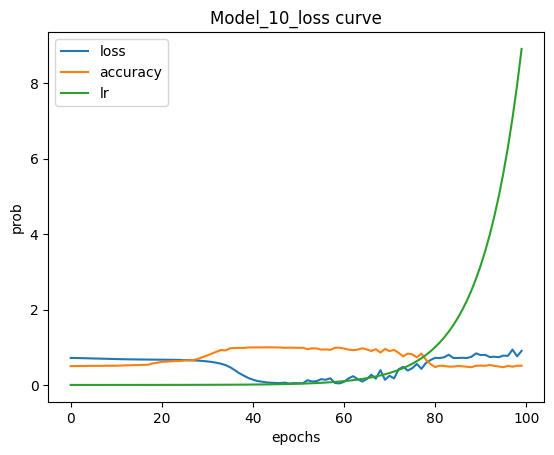

In [28]:
# checkout history
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_10_loss curve")
plt.xlabel("epochs")
plt.ylabel("prob")

As epochs increases, lr start increasing, and produces an exponential growth. Our accuracy increases, and after 60 epochs, shows decline and at 70 loss surparss the accuracy of the model. Appearently our model has a decent position at 45th epoch.

Text(0.5, 1.0, 'Learning Rate vs Loss')

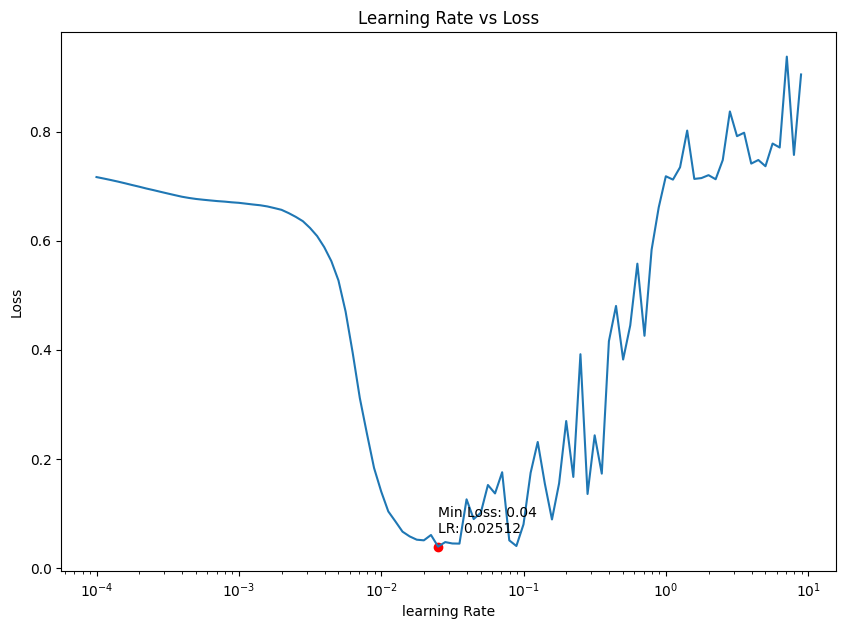

In [29]:
#### plot the learning rate against loss, to determine what might be the effective learning rate

lrs = 1e-4*(10**(tf.range(100)/20))    # replicating the learning rate scheduler
losses = history.history["loss"]

min_loss_idx = tf.argmin(losses).numpy()
min_loss = losses[min_loss_idx]
min_lr = lrs[min_loss_idx].numpy()

plt.figure(figsize = (10,7))
plt.semilogx(lrs, losses)       # we want log on x-scale
plt.scatter(min_lr, min_loss, color='red')  # Highlight the minimum loss point

# Annotate the minimum loss point
plt.annotate(f'Min Loss: {min_loss:.2f}\nLR: {min_lr:.5f}',
             (min_lr, min_loss),
             textcoords="offset points",
             xytext=(0,10),
             ha='left')

plt.xlabel("learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

it appears our ideal learning rate is less than 0.1259. The rule of thumb is to take learning rate where the loss is still decreasing... so some value b/w lowest point (0.12589) and below 10x of min point which might be 0.012.

We can find the best learning rate through this holistic approach, or use default value learning rate, like Adam has 0.001, or can choose from (1, 0.1, 0.01, 0.001. 0.0001). The reason behind those specific values examples is, whenever using pre-build optimizer, their default learning rate are quite good enough, however, when they dont, use values below 1 to identify which way the appropriate learning rate lies.

### More ways to improve our classification model.
We lookied at the:
* Activation Functions
* Optimizers
* Learning Rate
* Now... Evaluation methods (precision/ Recall trade offs)
  1. Accuracy,
  2. Precision
  3. F1-score
  4. Confusion Matrix
  5. Classification report (from scikit-learn)

  A lot of classification metrics follows similar principles, comparing true values against predictions. [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [30]:
# check accuracy of our model
loss, accuracy = model_10.evaluate(X,y)
print(f"model Loss: {loss}" )
print(f"model Accuracy: {accuracy}" )

32/32 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.5000
model Loss: 0.6975008249282837
model Accuracy: 0.5


#### Confusion Matrix - [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* True +ve: model predicts 1 when truth is 1
* True -ve: model predicts 0 when truth is 0
* False +ve: model predicts 1 when truth is 0
* False -ve: model predicts 0 when truth is 1


In [31]:
from sklearn.metrics import confusion_matrix


In [32]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [33]:
y_pred = model_7.predict(X)
y_pred [:10]

32/32 [==============================] - 0s 1ms/step


array([[0.5927251 ],
       [0.594533  ],
       [0.5946386 ],
       [0.5963099 ],
       [0.12085691],
       [0.5962965 ],
       [0.5927251 ],
       [0.5927251 ],
       [0.6083031 ],
       [0.5927251 ]], dtype=float32)

The prediction array has the standard output from sigmoid (softmax) activation fuunction. convert prediction prob to buinary output

In [34]:
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [35]:
# create confusion matrix
confusion_matrix(y, tf.round(y_pred))

array([[255, 245],
       [ 65, 435]])

not a neat confusion matrix.

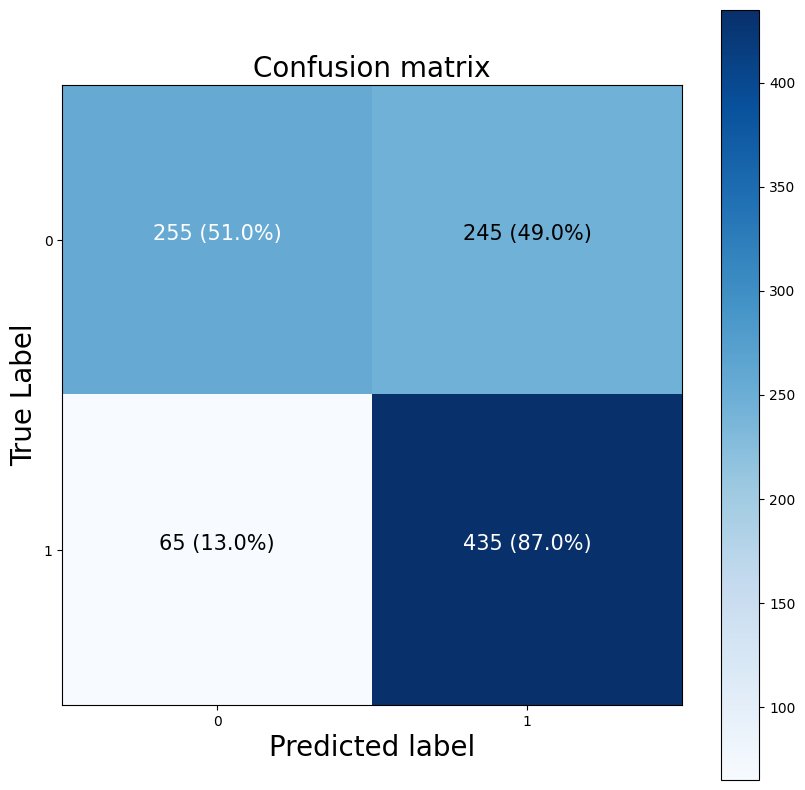

In [36]:
# purifying confusion matrix
import itertools

figsize = (10,10)

# create confusion matrix
cm = confusion_matrix(y, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis =1)[:, np.newaxis]     # normalize the confusion matrix
n_classes = cm.shape[0]

# make it more attractive
fig, ax = plt.subplots(figsize=figsize)
# create a Matrix plot
cax = ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

# create classes (in case of multiclass)
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axis
ax.set(title = "Confusion matrix",
       xlabel = "Predicted label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min())/2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color ="white" if cm[i,j]> threshold else "black",
           size=15)


## Multi-class Classification

More than 2 classes as an option. To practice multi-class model, we need to build a neural network to classify different images of different items.

[Data](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [37]:
 import tensorflow as tf
 from tensorflow.keras.datasets import fashion_mnist

 # The data is already being sorted in train and test
 (train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [39]:
# shape of single
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

This tensor of nos represents the training label 9 -> Ankle boot

In [42]:
# check shape of a single example:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

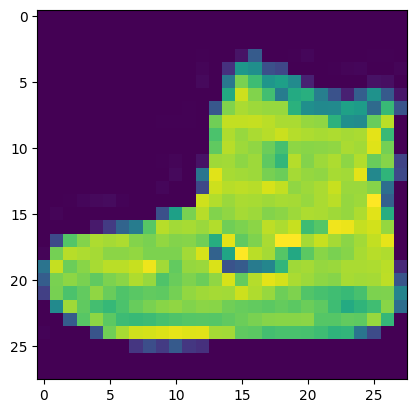

In [44]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])             # Ankle boot

(<matplotlib.image.AxesImage at 0x7ac3f8108a30>, 2)

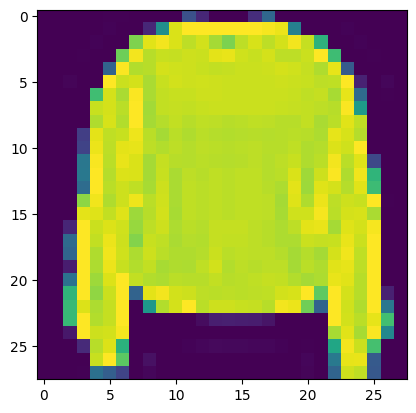

In [46]:
plt.imshow(train_data[7]) ,  train_labels[7]         # Pullover

In [47]:
# Create a small list, so we can index onto our training labels (to make it human readable)
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

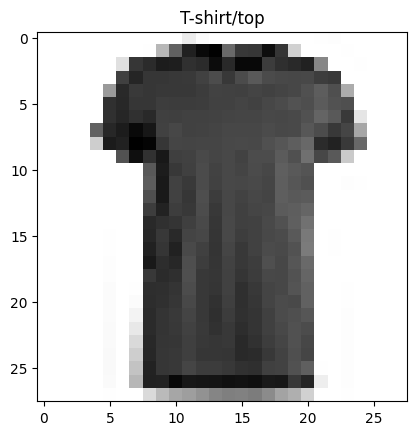

In [48]:
# plot an example with its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

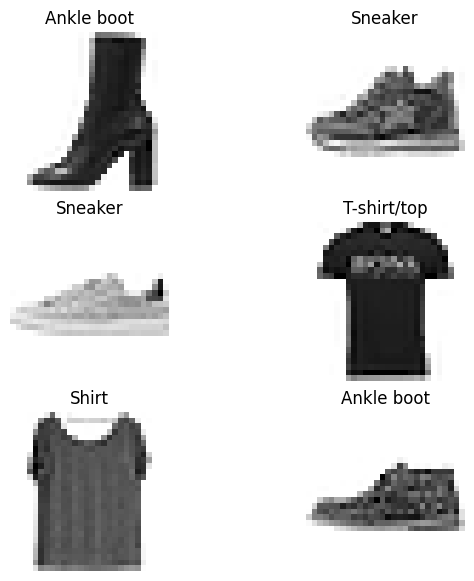

In [52]:
# Plot multiple random images of fashion Mnist (for proper visualization)

import random

plt.figure(figsize=(7,7))
for i in range(6):
  ax = plt.subplot(3,2,i+1)                        # 3 values, 2 cols, index = i+1
  rand_idx = random.choice(range(len(train_data))) # a random no
  plt.imshow(train_data[rand_idx], cmap = plt.cm.binary)
  plt.title(class_name[train_labels[rand_idx]])
  plt.axis(False)


it is important to visualize the sample randomly. For large datasets, it gives an opportunity to get familarize the data. Is it a Linear or non-linear data

### Building a multiclass classification model
For multiclass classification model, we use the similar architecture of our binary classification, however, with few modification:
* input shape - 28x28 (shape of one image)
* Output shape - 10 (one per class of clothing)
* Loss function - use CategoricalCrossentropy()
  1. if labels are one-hot encoded, then use CategoricalCrossentropy()
  2. if labels are integers, use SparseCategoricalCrossentropy()
* Output layer activation - softmax

In case of shape error:
* look input shape in the model,
* output shape in the model
* loss function

In [54]:
# Example - Flatten
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

# This flattens our data from 28x28 - (None,784)         28*28=784

(None, 784)

In [63]:
# set random seed
tf.random.set_seed(42)

# create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),    # Flattens the data
    tf.keras.layers.Dense(4,activation = "relu"),    # non-linear, b/c data is composed of straight lines and non-straight lines
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model - while training, on parallel it also start it evaluation on test data
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5573 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3020 - accuracy: 0.0980 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy:

The Loss & accuracy is related to training data, means how the model behaved on training data with training labels. It appears aour model spits 9.8% accuracy on training data. <br>
On the other hand, the val_loss and val_accuracy is based on the test set, which model has never seen, and its shockingly performing a bit better over test set, 10%. Though the training loss and val_loss is almost the same.

#### improving the model

In [57]:
# check the model summary
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 3140      
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


neural networks prefer data to be scaled (or normalized). This means they should lie b/w 0-1

In [58]:
# min & max of training data
train_data.min(), train_data.max()

(0, 255)

In [59]:
# Normalization
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# check the min & max of normalized data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [61]:
# re run the model with normalized data

# set random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5216 - accuracy: 0.4589 - val_loss: 1.1376 - val_accuracy: 0.6194
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0212 - accuracy: 0.6402 - val_loss: 0.9590 - val_accuracy: 0.6447
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9120 - accuracy: 0.6642 - val_loss: 0.9137 - val_accuracy: 0.6609
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8652 - accuracy: 0.6834 - val_loss: 0.8842 - val_accuracy: 0.6802
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8312 - accuracy: 0.7057 - val_loss: 0.8376 - val_accuracy: 0.7045
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7520 - accuracy: 0.7377 - val_loss: 0.7463 - val_accuracy: 0.7441
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6849 - accuracy: 0.7611 - val_loss: 0.7098 - val_accuracy

Normalizing shoots out training accuracy to 81.4% and test accuracy to almost 80%. The improvemmnt of performance has been observed.

<Axes: title={'center': 'Normalized data'}>

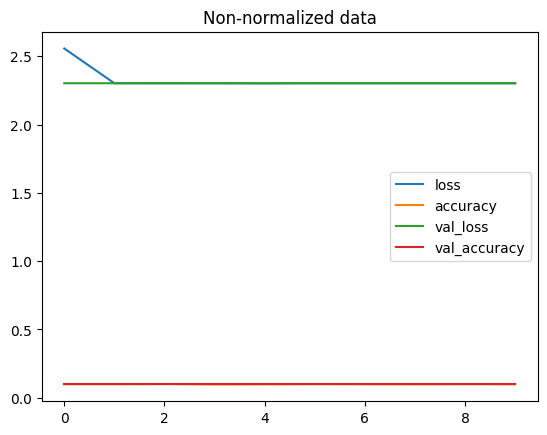

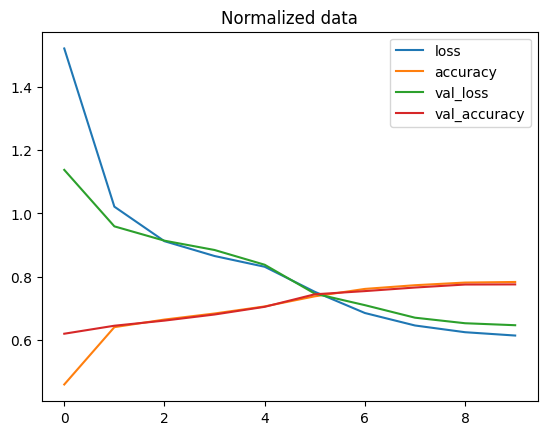

In [64]:
# visualize the loss
import pandas as pd

# plot non-normalized data
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data")

# plotnormalized data
pd.DataFrame(norm_history.history).plot(title = "Normalized data")



in non-normalized data, the loss stays way above accuracy, where as in  normalized data it drops significantly in first 2 epochs and later shows a gradual decrease in trend.

in non-normalized data, the accuracy pleatued, however in other case it shows an increasing trend.

### Finding the ideal learning rate

In [70]:
# set random seed
tf.random.set_seed(42)

# create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: (1e-3) * 10**(epoch/20))

# Fit the model
find_lr__history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data = (test_data_norm, test_labels),
                            callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0937 - accuracy: 0.6345 - val_loss: 0.8445 - val_accuracy: 0.7295 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7438 - accuracy: 0.7484 - val_loss: 0.7175 - val_accuracy: 0.7505 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6438 - accuracy: 0.7767 - val_loss: 0.6361 - val_accuracy: 0.7818 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5876 - accuracy: 0.7966 - val_loss: 0.6150 - val_accuracy: 0.7881 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5640 - accuracy: 0.8026 - val_loss: 0.5983 - val_accuracy: 0.7873 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5512 - accuracy: 0.8065 - val_loss: 0.6101 - val_accuracy: 0.7968 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Learning Rate vs Loss')

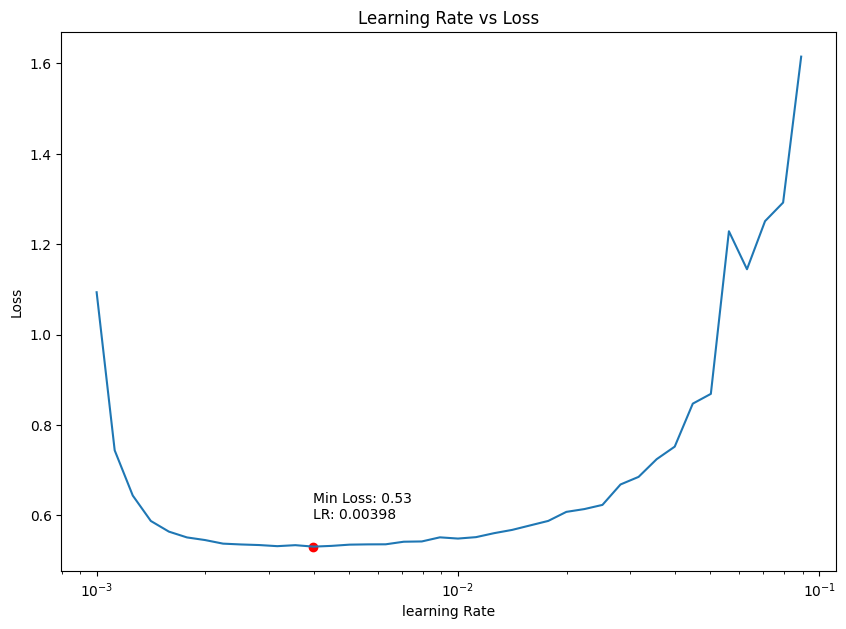

In [71]:
# plot learning rate decay curve:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
losses = find_lr__history.history["loss"]


min_loss_idx = tf.argmin(losses).numpy()
min_loss = losses[min_loss_idx]
min_lr = lrs[min_loss_idx].numpy()

plt.figure(figsize = (10,7))
plt.semilogx(lrs, losses)       # we want log on x-scale
plt.scatter(min_lr, min_loss, color='red')  # Highlight the minimum loss point

# Annotate the minimum loss point
plt.annotate(f'Min Loss: {min_loss:.2f}\nLR: {min_lr:.5f}',
             (min_lr, min_loss),
             textcoords="offset points",
             xytext=(0,20),
             ha='left')

plt.xlabel("learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

This shows our learning rate should be b/w 0.0004 - 0.00398 (10x previous values). Lets go with **0.001**

In [74]:
# set random seed
tf.random.set_seed(42)

# create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.001),         # this also happens to be Adam's default learning rate
                 metrics = ["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                            train_labels,
                            epochs=20,
                            validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3748 - accuracy: 0.5379 - val_loss: 0.9211 - val_accuracy: 0.7312
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7813 - accuracy: 0.7591 - val_loss: 0.7348 - val_accuracy: 0.7587
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6707 - accuracy: 0.7803 - val_loss: 0.6754 - val_accuracy: 0.7722
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6209 - accuracy: 0.7969 - val_loss: 0.6315 - val_accuracy: 0.7931
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5922 - accuracy: 0.8056 - val_loss: 0.6222 - val_accuracy: 0.7969
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5733 - accuracy: 0.8130 - val_loss: 0.6014 - val_accuracy: 0.7995
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5594 - accuracy: 0.8162 - val_loss: 0.5962 - val_accuracy:

### Evaluating multi-class classification model
To evaluate we could:
* Evaluate its performance using other classification metrics (eg Confusiion Matrix)
* Asses some of its prediction (through visualizations)
* Improve its results (by training for longer or change its architecture)
* Save and export it for use in an application

In [100]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize = (10,10), text_size = 15):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]     # normalize the confusion matrix
    n_classes = cm.shape[0]

    # Make it more attractive
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Label the axis
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size= text_size)

    plt.show()

In [89]:
test_pred = model_14.predict(test_data_norm)    # remember to make predictions on same data, as the model is trained on.

313/313 [==============================] - 1s 2ms/step


In [90]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [97]:
test_pred           # values 0-9


array([9, 2, 1, ..., 3, 1, 5])

In [94]:
test_labels, test_labels[0]     # values 0-9

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), 9)

In [92]:
# check if it works - higher no indicates the index
test_pred[0], tf.argmax(test_pred[0]), class_name[tf.argmax(test_pred[0])]

(array([2.29149350e-06, 8.09160099e-07, 2.24479763e-07, 5.99437522e-09,
        4.87564256e-09, 1.57128036e-01, 4.17438706e-08, 1.04816675e-01,
        1.22285159e-02, 7.25823402e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [96]:
# convert all test_preds to integers
test_pred = test_pred.argmax(axis=1)

AxisError: ignored

In [98]:
# checking accuracy:
loss, accuracy = model_14.evaluate(test_data,test_pred)
print(f"model Loss: {loss}" )
print(f"model Accuracy: {accuracy}" )

313/313 [==============================] - 2s 3ms/step - loss: 155.8178 - accuracy: 0.6505
model Loss: 155.81781005859375
model Accuracy: 0.6504999995231628


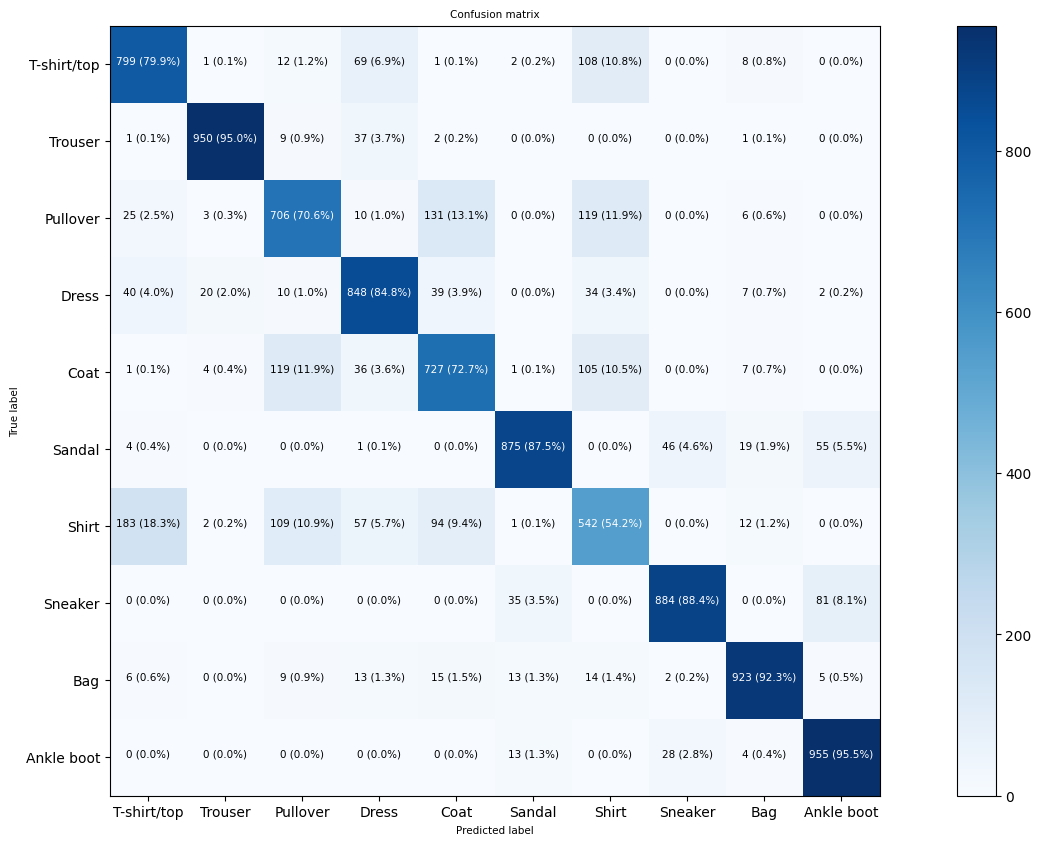

In [104]:
# create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(y_true = test_labels, y_pred = test_pred, classes = class_name, figsize = (20,10), text_size = 7.5)


The confusion matrix shows what model confuses with what. It appears 16% of TShirt/top were shirt, or 13% pullover predicted as coat and 11.9% as shirts, 8.1% sneakers with sneakers. This show our model is confused b/w the 2, and making erors. ChatGPT the stretegies for improvements.

#### other way to visualize:
make a function for:
* Plot a random image,
* make a prediction on said Image
* label the plot with the truth & predicted label.

In [116]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plot it and labels it with a prediction and truth label
  """
  # Set up a random integer
  i = random.randint(0, len(images))

  # create predictions & Targets
  target_image = images[i]
  prediction_prob = model.predict(target_image.reshape(1,28,28))        # have to reshape it  b/c its only a single image
  prediction_label = classes[prediction_prob.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of titles depending on if the prediction is right or wrong
  if prediction_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel info (prediction/ true label)
  plt.xlabel("Prediction: {}{:2.0f}% (True: {})".format(prediction_label,
                                                        100*tf.reduce_max(prediction_prob),
                                                        true_label), color=color)         # set the color green/red based on right/wrong prediction


1/1 [==============================] - 0s 23ms/step


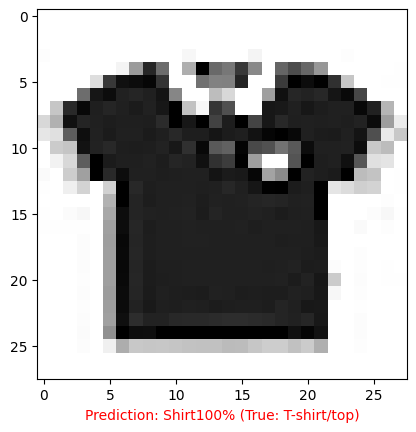

In [124]:
# check random image & its prediction
plot_random_image(model = model_14,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_name )

### What patterns our model is exactly learning?
